In [12]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
%matplotlib inline
from datetime import timedelta


In [13]:
ddir= '/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'
#read in different files
def open_ds(var,case,esm='cesm',model='cam',ens='001',stream='h0'):
    if esm=='cesm':
        if case[:4]=='hist':
            comp='BHIST'
            tseriesdir = ddir + 'b.e213.'+comp+'_BPRP.f09_g17.esm-hist-i308.'+ens+'/' 
        else:
            comp='BSSP126'
            tseriesdir = ddir + 'b.e213.'+comp+'_BPRP.f09_g17.esm-'+case+'-i308.'+ens+'/' 

        # define filename
        fn = var+'_b.e213.'+comp+'_BPRP.f09_g17.esm-'+case+'-i308.'+ ens + '.' + model + '.' + stream + '.nc'
    else:
        ens='i'+ens[-1]

        if case=='hist':
            case='histctl'
            tspan='1980-2014'
        else:
            tspan='2015-2099'
        tseriesdir = ddir + esm+'/'+case+'/'
        # define filename
        if stream=='h0':
            fn = var+'_monthly_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'
        elif stream=='h2':
            fn = var+'_3hr_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'
        elif stream=='h1':
            fn = var+'_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'

    # check if variable timeseries exists and open variable as data array
    if not os.path.isfile(tseriesdir + fn):
        print(fn + ' does not exists in ')
        print(tseriesdir)
        return
    else: 
        
        if esm=='cesm':
            ds = xr.open_dataset(tseriesdir+fn)
        else:
           # ds = xr.open_dataset(savedir+fn)
            #print(ds.time.attrs['units'])
            ds = xr.open_dataset(tseriesdir+fn)
            ds['time']=pd.to_datetime(ds['time'], format='%Y%m%d') 
        return ds

def open_da(var, case,esm='cesm', model='cam',ens='001',stream='h0'):
    ds = open_ds(var, case, esm,model,ens,stream)
    if var=='2t':
        var='var167'
    da = ds[var]
    return da



ds_TREFHT_hist_1=open_da('TREFHT','hist','cesm','cam','001')
ds_TREFHT_hist_2=open_da('TREFHT','hist','cesm','cam','002')
ds_TREFHT_hist_3=open_da('TREFHT','hist','cesm','cam','003')

ds_TREFHT_ctl_1=open_da('TREFHT','futctl','cesm','cam','001')
ds_TREFHT_ctl_2=open_da('TREFHT','futctl','cesm','cam','002')
ds_TREFHT_ctl_3=open_da('TREFHT','futctl','cesm','cam','003')

ds_TREFHT_sust_1=open_da('TREFHT','futsust','cesm','cam','001')
ds_TREFHT_sust_2=open_da('TREFHT','futsust','cesm','cam','002')
ds_TREFHT_sust_3=open_da('TREFHT','futsust','cesm','cam','003')

ds_TREFHT_ineq_1=open_da('TREFHT','futineq','cesm','cam','001')
ds_TREFHT_ineq_2=open_da('TREFHT','futineq','cesm','cam','002')
ds_TREFHT_ineq_3=open_da('TREFHT','futineq','cesm','cam','003')


ds_TREFHT_mpiesm_hist_1=open_da('tas','hist','mpiesm','cam','001')
ds_TREFHT_mpiesm_hist_2=open_da('tas','hist','mpiesm','cam','002')
ds_TREFHT_mpiesm_hist_3=open_da('tas','hist','mpiesm','cam','003')

ds_TREFHT_mpiesm_ctl_1=open_da('tas','futctl','mpiesm','cam','001')
ds_TREFHT_mpiesm_ctl_2=open_da('tas','futctl','mpiesm','cam','002')
ds_TREFHT_mpiesm_ctl_3=open_da('tas','futctl','mpiesm','cam','003')

ds_TREFHT_mpiesm_sust_1=open_da('tas','futsust','mpiesm','cam','001')
ds_TREFHT_mpiesm_sust_2=open_da('tas','futsust','mpiesm','cam','002')
ds_TREFHT_mpiesm_sust_3=open_da('tas','futsust','mpiesm','cam','003')

ds_TREFHT_mpiesm_ineq_1=open_da('tas','futineq','mpiesm','cam','001')
ds_TREFHT_mpiesm_ineq_2=open_da('tas','futineq','mpiesm','cam','002')
ds_TREFHT_mpiesm_ineq_3=open_da('tas','futineq','mpiesm','cam','003')

ds_TREFHT_ecearth_hist_1=open_da('tas','hist','ecearth','cam','001')
ds_TREFHT_ecearth_hist_2=open_da('tas','hist','ecearth','cam','002')
ds_TREFHT_ecearth_hist_3=open_da('tas','hist','ecearth','cam','003')

ds_TREFHT_ecearth_ctl_1=open_da('tas','futctl','ecearth','cam','001')
ds_TREFHT_ecearth_ctl_2=open_da('tas','futctl','ecearth','cam','002')
ds_TREFHT_ecearth_ctl_3=open_da('tas','futctl','ecearth','cam','003')

ds_TREFHT_ecearth_sust_1=open_da('tas','futsust','ecearth','cam','001')
ds_TREFHT_ecearth_sust_2=open_da('tas','futsust','ecearth','cam','002')
ds_TREFHT_ecearth_sust_3=open_da('tas','futsust','ecearth','cam','003')

ds_TREFHT_ecearth_ineq_1=open_da('tas','futineq','ecearth','cam','001')
ds_TREFHT_ecearth_ineq_2=open_da('tas','futineq','ecearth','cam','002')
ds_TREFHT_ecearth_ineq_3=open_da('tas','futineq','ecearth','cam','003')


In [14]:
##compute statistical significance of differences
#1) pool all ensemble members
#2) take spatial mean
#3) compute differences, stdev and significance

from scipy import stats
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_hist_2.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_hist_3.mean(['lat','lon'])[-30*12-1:-1]],'time')
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_ineq_2.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_ineq_3.mean(['lat','lon'])[-30*12-1:-1]],'time')
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_sust_2.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_sust_3.mean(['lat','lon'])[-30*12-1:-1]],'time')
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_ctl_2.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_ctl_3.mean(['lat','lon'])[-30*12-1:-1]],'time')

diff_ctl=ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values
diff_sust=ds_TREFHT_sust_mean.values-ds_TREFHT_ctl_mean.values
diff_ineq=ds_TREFHT_ineq_mean.values-ds_TREFHT_ctl_mean.values
diff_lcc=ds_TREFHT_sust_mean.values-ds_TREFHT_ineq_mean.values

diff_list=[diff_ctl,diff_sust,diff_ineq,diff_lcc]
case_list=['futctl-presctl','sust-futctl','ineq-futctl','sust-ineq']
print('CESM')
for i in range(len(diff_list)):
    print(case_list[i])
    print(np.mean(diff_list[i]))
    print(np.std(diff_list[i]))
    n = len(diff_list[i])
    std_err = np.std(diff_list[i]) / np.sqrt(n)
    ci = stats.norm.interval(0.95, loc=np.mean(diff_list[i]), scale=std_err)    
    print(ci)
    jos,pvalue= stats.wilcoxon(diff_list[i])
    print(pvalue)


ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_hist_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_hist_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_ineq_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_ineq_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_sust_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_sust_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_ctl_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_ctl_3.mean(['lat','lon'])[-30*12:]],'time')

diff_ctl=ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values
diff_sust=ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_ctl_mean.values
diff_ineq=ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_ctl_mean.values
diff_lcc=ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_ineq_mean.values

diff_list=[diff_ctl,diff_sust,diff_ineq,diff_lcc]
case_list=['futctl-presctl','sust-futctl','ineq-futctl','sust-ineq']
print('EC-EARTH')
for i in range(len(diff_list)):
    print(case_list[i])
    print(np.mean(diff_list[i]))
    print(np.std(diff_list[i]))
    n = len(diff_list[i])
    std_err = np.std(diff_list[i]) / np.sqrt(n)
    ci = stats.norm.interval(0.95, loc=np.mean(diff_list[i]), scale=std_err)    
    print(ci)
    jos,pvalue= stats.wilcoxon(diff_list[i])
    print(pvalue)
    

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_hist_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_hist_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_sust_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_sust_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon'])[-30*12:]],'time')

diff_ctl=ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values
diff_sust=ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_ctl_mean.values
diff_ineq=ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_ctl_mean.values
diff_lcc=ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_ineq_mean.values

diff_list=[diff_ctl,diff_sust,diff_ineq,diff_lcc]
case_list=['futctl-presctl','sust-futctl','ineq-futctl','sust-ineq']
print('MPI-ESM')
for i in range(len(diff_list)):
    print(case_list[i])
    print(np.mean(diff_list[i]))
    print(np.std(diff_list[i]))
    n = len(diff_list[i])
    std_err = np.std(diff_list[i]) / np.sqrt(n)
    ci = stats.norm.interval(0.95, loc=np.mean(diff_list[i]), scale=std_err)    
    print(ci)
    jos,pvalue= stats.wilcoxon(diff_list[i])
    print(pvalue)

CESM
futctl-presctl
1.0532733
0.5481718
(1.020580459965556, 1.0859661804305623)
3.8909804389673486e-176
sust-futctl
-0.06718987
0.38216642
(-0.08998220267998902, -0.044397541849735093)
3.7641412455985755e-09
ineq-futctl
0.2885674
0.3772169
(0.2660702514190703, 0.3110645366172761)
1.3847166665150744e-95
sust-ineq
-0.3557573
0.3875658
(-0.37887164424029685, -0.3326429479304185)
4.014890284327222e-118
EC-EARTH
futctl-presctl
1.0202262
0.5320006
(0.9884978281485798, 1.0519546521675824)
5.120493780991088e-177
sust-futctl
0.06287048
0.37334228
(0.040604419682166756, 0.08513654055819732)
2.8456615500884428e-08
ineq-futctl
0.29585674
0.37143525
(0.27370441796164124, 0.318009070140318)
1.4351901859470899e-100
sust-ineq
-0.23298629
0.31080747
(-0.25152278291246655, -0.2144497896526122)
4.0584034620180575e-92
MPI-ESM
futctl-presctl
0.3529427
0.44987226
(0.3261124116661227, 0.3797729986427152)
6.293477297444989e-96
sust-futctl
0.06652103
0.34791067
(0.04577170905661962, 0.0872703582327328)
7.32094

In [15]:
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_hist_2.mean(['lat','lon'])[-30:],ds_TREFHT_hist_3.mean(['lat','lon'])[-30:]],'time')
print(ds_TREFHT_hist_1.mean(['lat','lon'])[-30*12-1:-1])

<xarray.DataArray 'TREFHT' (time: 360)>
array([277.11044, 276.81653, 276.41556, 276.32852, 276.89252, 278.55817,
       280.08835, 280.1525 , 280.0837 , 278.7823 , 278.09702, 277.33655,
       277.02615, 276.67856, 275.797  , 275.71017, 276.97577, 279.08395,
       280.2265 , 280.2711 , 280.32248, 279.12643, 277.8839 , 277.68744,
       277.3018 , 277.27747, 276.68668, 276.3464 , 277.35913, 278.97662,
       279.80493, 280.11087, 279.94995, 279.27017, 278.4724 , 278.04938,
       277.43176, 276.94922, 276.3559 , 275.7847 , 277.52014, 278.95724,
       279.8369 , 280.15875, 280.39966, 279.17203, 278.41675, 277.75803,
       277.50748, 276.9619 , 276.7353 , 276.06943, 277.22748, 279.05292,
       280.29437, 280.1321 , 280.1613 , 279.18774, 278.17908, 277.62234,
       277.18472, 276.52017, 276.15555, 276.2594 , 277.3494 , 279.15897,
       280.00375, 280.0615 , 279.98578, 279.41586, 278.12906, 277.1772 ,
       277.1098 , 276.87796, 275.94498, 275.5292 , 277.02615, 278.84915,
       280.

In [16]:
#compute spatial means (global and/or regional)

ds_TREFHT_ecearth_hist_1_mean=ds_TREFHT_ecearth_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_hist_2_mean=ds_TREFHT_ecearth_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_hist_3_mean=ds_TREFHT_ecearth_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]

ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1_mean,ds_TREFHT_ecearth_hist_2_mean,ds_TREFHT_ecearth_hist_3_mean],'time')

ds_TREFHT_ecearth_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1_mean,ds_TREFHT_ecearth_ctl_2_mean,ds_TREFHT_ecearth_ctl_3_mean],'time')

ds_TREFHT_ecearth_sust_1_mean=ds_TREFHT_ecearth_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_sust_2_mean=ds_TREFHT_ecearth_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_sust_3_mean=ds_TREFHT_ecearth_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1_mean,ds_TREFHT_ecearth_sust_2_mean,ds_TREFHT_ecearth_sust_3_mean],'time')

ds_TREFHT_ecearth_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1_mean,ds_TREFHT_ecearth_ineq_2_mean,ds_TREFHT_ecearth_ineq_3_mean],'time')


ds_TREFHT_mpiesm_hist_1_mean=ds_TREFHT_mpiesm_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_hist_2_mean=ds_TREFHT_mpiesm_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_hist_3_mean=ds_TREFHT_mpiesm_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1_mean,ds_TREFHT_mpiesm_hist_2_mean,ds_TREFHT_mpiesm_hist_3_mean],'time')

ds_TREFHT_mpiesm_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1_mean,ds_TREFHT_mpiesm_ctl_2_mean,ds_TREFHT_mpiesm_ctl_3_mean],'time')

ds_TREFHT_mpiesm_sust_1_mean=ds_TREFHT_mpiesm_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_sust_2_mean=ds_TREFHT_mpiesm_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_sust_3_mean=ds_TREFHT_mpiesm_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1_mean,ds_TREFHT_mpiesm_sust_2_mean,ds_TREFHT_mpiesm_sust_3_mean],'time')

ds_TREFHT_mpiesm_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1_mean,ds_TREFHT_mpiesm_ineq_2_mean,ds_TREFHT_mpiesm_ineq_3_mean],'time')


ds_TREFHT_hist_1_mean=ds_TREFHT_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_2_mean=ds_TREFHT_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_3_mean=ds_TREFHT_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1_mean,ds_TREFHT_hist_2_mean,ds_TREFHT_hist_3_mean],'time')

ds_TREFHT_ctl_1_mean=ds_TREFHT_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_2_mean=ds_TREFHT_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_3_mean=ds_TREFHT_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1_mean,ds_TREFHT_ctl_2_mean,ds_TREFHT_ctl_3_mean],'time')

ds_TREFHT_sust_1_mean=ds_TREFHT_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_2_mean=ds_TREFHT_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_3_mean=ds_TREFHT_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1_mean,ds_TREFHT_sust_2_mean,ds_TREFHT_sust_3_mean],'time')

ds_TREFHT_ineq_1_mean=ds_TREFHT_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_2_mean=ds_TREFHT_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_3_mean=ds_TREFHT_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1_mean,ds_TREFHT_ineq_2_mean,ds_TREFHT_ineq_3_mean],'time')


In [17]:
#compute spatial means (global and/or regional)
mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_ecearth_no_ice.nc')
da_mask=mask_cesm['landmask']
#    da_mask['lat']=da_delta.lat
#    da_mask['lon']=da_delta.lon
ds_TREFHT_ecearth_land_hist_1_mean=ds_TREFHT_ecearth_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_hist_2_mean=ds_TREFHT_ecearth_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_hist_3_mean=ds_TREFHT_ecearth_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_hist_mean=xr.concat([ds_TREFHT_ecearth_land_hist_1_mean,ds_TREFHT_ecearth_land_hist_2_mean,ds_TREFHT_ecearth_land_hist_3_mean],'time')


ds_TREFHT_ecearth_land_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_mean=xr.concat([ds_TREFHT_ecearth_land_ctl_1_mean,ds_TREFHT_ecearth_land_ctl_2_mean,ds_TREFHT_ecearth_land_ctl_3_mean],'time')


ds_TREFHT_ecearth_land_sust_1_mean=ds_TREFHT_ecearth_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_2_mean=ds_TREFHT_ecearth_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_3_mean=ds_TREFHT_ecearth_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_mean=xr.concat([ds_TREFHT_ecearth_land_sust_1_mean,ds_TREFHT_ecearth_land_sust_2_mean,ds_TREFHT_ecearth_land_sust_3_mean],'time')


ds_TREFHT_ecearth_land_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_mean=xr.concat([ds_TREFHT_ecearth_land_ineq_1_mean,ds_TREFHT_ecearth_land_ineq_2_mean,ds_TREFHT_ecearth_land_ineq_3_mean],'time')

mask_cesm=xr.open_dataset(mask_dir+'landmask_mpiesm_no_ice.nc')
da_mask=mask_cesm['landmask']
da_mask['lat']=ds_TREFHT_mpiesm_hist_1.lat
da_mask['lon']=ds_TREFHT_mpiesm_hist_1.lon

ds_TREFHT_mpiesm_land_hist_1_mean=ds_TREFHT_mpiesm_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_2_mean=ds_TREFHT_mpiesm_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_3_mean=ds_TREFHT_mpiesm_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_mean=xr.concat([ds_TREFHT_mpiesm_land_hist_1_mean,ds_TREFHT_mpiesm_land_hist_2_mean,ds_TREFHT_mpiesm_land_hist_3_mean],'time')


ds_TREFHT_mpiesm_land_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_mean=xr.concat([ds_TREFHT_mpiesm_land_ctl_1_mean,ds_TREFHT_mpiesm_land_ctl_2_mean,ds_TREFHT_mpiesm_land_ctl_3_mean],'time')


ds_TREFHT_mpiesm_land_sust_1_mean=ds_TREFHT_mpiesm_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_2_mean=ds_TREFHT_mpiesm_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_3_mean=ds_TREFHT_mpiesm_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_mean=xr.concat([ds_TREFHT_mpiesm_land_sust_1_mean,ds_TREFHT_mpiesm_land_sust_2_mean,ds_TREFHT_mpiesm_land_sust_3_mean],'time')


ds_TREFHT_mpiesm_land_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_mean=xr.concat([ds_TREFHT_mpiesm_land_ineq_1_mean,ds_TREFHT_mpiesm_land_ineq_2_mean,ds_TREFHT_mpiesm_land_ineq_3_mean],'time')

mask_cesm=xr.open_dataset(mask_dir+'landmask_cesm_no_ice.nc')
da_mask=mask_cesm['landmask']

ds_TREFHT_land_hist_1_mean=ds_TREFHT_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_2_mean=ds_TREFHT_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_3_mean=ds_TREFHT_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_mean=xr.concat([ds_TREFHT_land_hist_1_mean,ds_TREFHT_land_hist_2_mean,ds_TREFHT_land_hist_3_mean],'time')


ds_TREFHT_land_ctl_1_mean=ds_TREFHT_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_2_mean=ds_TREFHT_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_3_mean=ds_TREFHT_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_mean=xr.concat([ds_TREFHT_land_ctl_1_mean,ds_TREFHT_land_ctl_2_mean,ds_TREFHT_land_ctl_3_mean],'time')


ds_TREFHT_land_sust_1_mean=ds_TREFHT_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_2_mean=ds_TREFHT_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_3_mean=ds_TREFHT_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_mean=xr.concat([ds_TREFHT_land_sust_1_mean,ds_TREFHT_land_sust_2_mean,ds_TREFHT_land_sust_3_mean],'time')


ds_TREFHT_land_ineq_1_mean=ds_TREFHT_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_2_mean=ds_TREFHT_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_3_mean=ds_TREFHT_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_mean=xr.concat([ds_TREFHT_land_ineq_1_mean,ds_TREFHT_land_ineq_2_mean,ds_TREFHT_land_ineq_3_mean],'time')



[Text(1.5, 0, 'futctl-histctl'),
 Text(3.5, 0, 'inequality-histctl'),
 Text(5.5, 0, 'equality-histctl')]

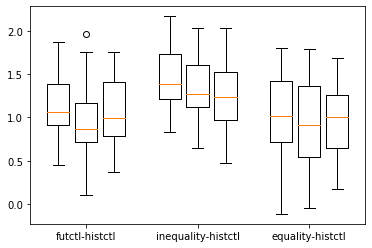

In [18]:
#make bar plots (3 bars ctl-hist, ineq-ctl and sust-ctl with variability shown through min/max or boxplot?)
data=[ds_TREFHT_ctl_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_ineq_1_mean.values-ds_TREFHT_ctl_1_mean.values,ds_TREFHT_sust_1_mean.values-ds_TREFHT_ctl_1_mean.values]
data1=[ds_TREFHT_ctl_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_ctl_2_mean.values-ds_TREFHT_hist_2_mean.values,ds_TREFHT_ctl_3_mean.values-ds_TREFHT_hist_3_mean.values]
data2=[ds_TREFHT_ineq_1_mean.values-ds_TREFHT_ctl_1_mean.values,ds_TREFHT_ineq_2_mean.values-ds_TREFHT_ctl_2_mean.values,ds_TREFHT_ineq_3_mean.values-ds_TREFHT_ctl_3_mean.values]
data3=[ds_TREFHT_sust_1_mean.values-ds_TREFHT_ctl_1_mean.values,ds_TREFHT_sust_2_mean.values-ds_TREFHT_ctl_2_mean.values,ds_TREFHT_sust_3_mean.values-ds_TREFHT_ctl_3_mean.values]
data4=[ds_TREFHT_ineq_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_ineq_2_mean.values-ds_TREFHT_hist_2_mean.values,ds_TREFHT_ineq_3_mean.values-ds_TREFHT_hist_3_mean.values]
data5=[ds_TREFHT_sust_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_sust_2_mean.values-ds_TREFHT_hist_2_mean.values,ds_TREFHT_sust_3_mean.values-ds_TREFHT_hist_3_mean.values]


fig1, ax = plt.subplots()


# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data4, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data5, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['futctl-histctl', 'inequality-histctl', 'equality-histctl'])


Text(0, 0.5, 'GMT change to preindustrial')

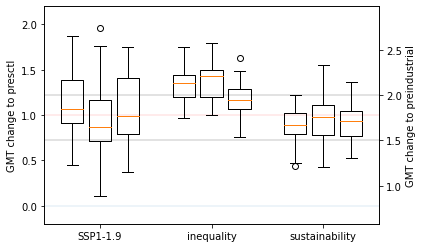

In [19]:
fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.2,2.2)
ax2.set_ylim(0.58,2.98)
ax.set_xlim(0.5,6.5)

data2=[ds_TREFHT_ineq_1_mean.values-ds_TREFHT_ctl_1_mean.values+1,ds_TREFHT_ineq_2_mean.values-ds_TREFHT_ctl_2_mean.values+1,ds_TREFHT_ineq_3_mean.values-ds_TREFHT_ctl_3_mean.values+1]
data3=[ds_TREFHT_sust_1_mean.values-ds_TREFHT_ctl_1_mean.values+1,ds_TREFHT_sust_2_mean.values-ds_TREFHT_ctl_2_mean.values+1,ds_TREFHT_sust_3_mean.values-ds_TREFHT_ctl_3_mean.values+1]

# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data2, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data3, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['SSP1-1.9', 'inequality', 'sustainability'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
ax.hlines(y=1,xmin=0,xmax=10,alpha=0.1,color='r')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax.set_ylabel('GMT change to presctl')
ax2.set_ylabel('GMT change to preindustrial')

In [20]:
print(np.median(data2[:])-1)

0.2871246337890625


Text(0, 0.5, 'GMT change to futctl')

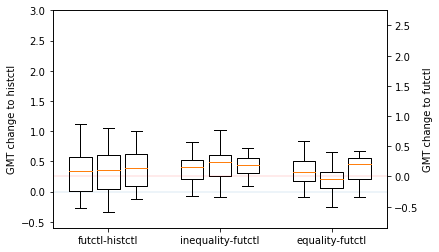

In [21]:
fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.6,3)
ax2.set_ylim(-0.85,2.75)
ax.set_xlim(0.5,6.5)

data1=[ds_TREFHT_mpiesm_ctl_1_mean.values-ds_TREFHT_mpiesm_hist_1_mean.values,ds_TREFHT_mpiesm_ctl_2_mean.values-ds_TREFHT_mpiesm_hist_2_mean.values,ds_TREFHT_mpiesm_ctl_3_mean.values-ds_TREFHT_mpiesm_hist_3_mean.values]
data2=[ds_TREFHT_mpiesm_ineq_1_mean.values-ds_TREFHT_mpiesm_ctl_1_mean.values+0.25,ds_TREFHT_mpiesm_ineq_2_mean.values-ds_TREFHT_mpiesm_ctl_2_mean.values+0.25,ds_TREFHT_mpiesm_ineq_3_mean.values-ds_TREFHT_mpiesm_ctl_3_mean.values+0.25]
data3=[ds_TREFHT_mpiesm_sust_1_mean.values-ds_TREFHT_mpiesm_ctl_1_mean.values+0.25,ds_TREFHT_mpiesm_sust_2_mean.values-ds_TREFHT_mpiesm_ctl_2_mean.values+0.25,ds_TREFHT_mpiesm_sust_3_mean.values-ds_TREFHT_mpiesm_ctl_3_mean.values+0.25]


# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data2, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data3, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['futctl-histctl', 'inequality-futctl', 'equality-futctl'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to histctl')
ax2.set_ylabel('GMT change to futctl')

Text(0, 0.5, 'GMT change to futctl')

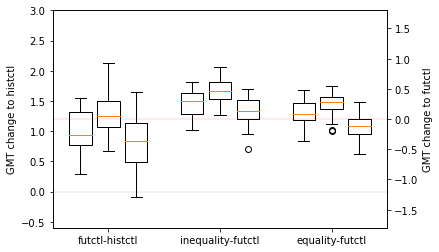

In [22]:
fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.6,3)
ax2.set_ylim(-1.8,1.8)
ax.set_xlim(0.5,6.5)

data1=[ds_TREFHT_ecearth_ctl_1_mean.values-ds_TREFHT_ecearth_hist_1_mean.values,ds_TREFHT_ecearth_ctl_2_mean.values-ds_TREFHT_ecearth_hist_2_mean.values,ds_TREFHT_ecearth_ctl_3_mean.values-ds_TREFHT_ecearth_hist_3_mean.values]
data2=[ds_TREFHT_ecearth_ineq_1_mean.values-ds_TREFHT_ecearth_ctl_1_mean.values+1.2,ds_TREFHT_ecearth_ineq_2_mean.values-ds_TREFHT_ecearth_ctl_2_mean.values+1.2,ds_TREFHT_ecearth_ineq_3_mean.values-ds_TREFHT_ecearth_ctl_3_mean.values+1.2]
data3=[ds_TREFHT_ecearth_sust_1_mean.values-ds_TREFHT_ecearth_ctl_1_mean.values+1.2,ds_TREFHT_ecearth_sust_2_mean.values-ds_TREFHT_ecearth_ctl_2_mean.values+1.2,ds_TREFHT_ecearth_sust_3_mean.values-ds_TREFHT_ecearth_ctl_3_mean.values+1.2]


# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data2, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data3, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['futctl-histctl', 'inequality-futctl', 'equality-futctl'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to histctl')
ax2.set_ylabel('GMT change to futctl')

Text(0, 0.5, 'GMT change to preindustrial (°C)')

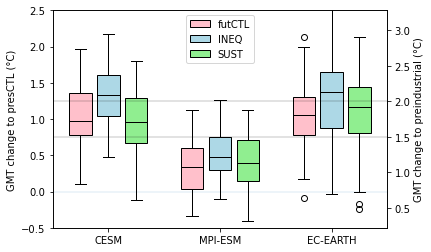

In [23]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.5,2.5)
ax2.set_ylim(0.22,3.28)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_ineq_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_sust_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to presCTL (°C)')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futCTL', 'INEQ','SUST'])

#ax2.set_ylabel('GMT change to futctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('GMT change to preindustrial (°C)')

In [13]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.0530453,mpiesm 0.35293987,ecearth 1.0202236


In [14]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.3416127,mpiesm 0.5229116,ecearth 1.316081


In [15]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 0.9858531,mpiesm 0.41946343,ecearth 1.0830953


Text(0, 0.5, 'GMT change to preindustrial')

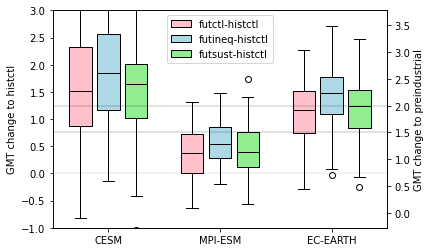

In [16]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-1,3)
ax2.set_ylim(-0.28,3.78)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_land_ctl_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ctl_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ctl_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_land_ineq_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ineq_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ineq_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_land_sust_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_sust_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_sust_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to histctl')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futctl-histctl', 'futineq-histctl','futsust-histctl'])

#ax2.set_ylabel('GMT change to futland_ctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('GMT change to preindustrial')


In [17]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.584035,mpiesm 0.36705932,ecearth 1.130245


In [18]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.845182,mpiesm 0.561872,ecearth 1.4087412


In [19]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.4800557,mpiesm 0.45736796,ecearth 1.1713209


In [20]:


ds_TREFHT_hist_1=open_da('wbgt','hist','cesm','cam','001')
ds_TREFHT_hist_2=open_da('wbgt','hist','cesm','cam','002')
ds_TREFHT_hist_3=open_da('wbgt','hist','cesm','cam','003')

ds_TREFHT_ctl_1=open_da('wbgt','futctl','cesm','cam','001')
ds_TREFHT_ctl_2=open_da('wbgt','futctl','cesm','cam','002')
ds_TREFHT_ctl_3=open_da('wbgt','futctl','cesm','cam','003')

ds_TREFHT_sust_1=open_da('wbgt','futsust','cesm','cam','001')
ds_TREFHT_sust_2=open_da('wbgt','futsust','cesm','cam','002')
ds_TREFHT_sust_3=open_da('wbgt','futsust','cesm','cam','003')

ds_TREFHT_ineq_1=open_da('wbgt','futineq','cesm','cam','001')
ds_TREFHT_ineq_2=open_da('wbgt','futineq','cesm','cam','002')
ds_TREFHT_ineq_3=open_da('wbgt','futineq','cesm','cam','003')


ds_TREFHT_mpiesm_hist_1=open_da('wbgt','hist','mpiesm','cam','001')
ds_TREFHT_mpiesm_hist_2=open_da('wbgt','hist','mpiesm','cam','002')
ds_TREFHT_mpiesm_hist_3=open_da('wbgt','hist','mpiesm','cam','003')

ds_TREFHT_mpiesm_ctl_1=open_da('wbgt','futctl','mpiesm','cam','001')
ds_TREFHT_mpiesm_ctl_2=open_da('wbgt','futctl','mpiesm','cam','002')
ds_TREFHT_mpiesm_ctl_3=open_da('wbgt','futctl','mpiesm','cam','003')

ds_TREFHT_mpiesm_sust_1=open_da('wbgt','futsust','mpiesm','cam','001')
ds_TREFHT_mpiesm_sust_2=open_da('wbgt','futsust','mpiesm','cam','002')
ds_TREFHT_mpiesm_sust_3=open_da('wbgt','futsust','mpiesm','cam','003')

ds_TREFHT_mpiesm_ineq_1=open_da('wbgt','futineq','mpiesm','cam','001')
ds_TREFHT_mpiesm_ineq_2=open_da('wbgt','futineq','mpiesm','cam','002')
ds_TREFHT_mpiesm_ineq_3=open_da('wbgt','futineq','mpiesm','cam','003')

ds_TREFHT_ecearth_hist_1=open_da('wbgt','hist','ecearth','cam','001')
ds_TREFHT_ecearth_hist_2=open_da('wbgt','hist','ecearth','cam','002')
ds_TREFHT_ecearth_hist_3=open_da('wbgt','hist','ecearth','cam','003')

ds_TREFHT_ecearth_ctl_1=open_da('wbgt','futctl','ecearth','cam','001')
ds_TREFHT_ecearth_ctl_2=open_da('wbgt','futctl','ecearth','cam','002')
ds_TREFHT_ecearth_ctl_3=open_da('wbgt','futctl','ecearth','cam','003')

ds_TREFHT_ecearth_sust_1=open_da('wbgt','futsust','ecearth','cam','001')
ds_TREFHT_ecearth_sust_2=open_da('wbgt','futsust','ecearth','cam','002')
ds_TREFHT_ecearth_sust_3=open_da('wbgt','futsust','ecearth','cam','003')

ds_TREFHT_ecearth_ineq_1=open_da('wbgt','futineq','ecearth','cam','001')
ds_TREFHT_ecearth_ineq_2=open_da('wbgt','futineq','ecearth','cam','002')
ds_TREFHT_ecearth_ineq_3=open_da('wbgt','futineq','ecearth','cam','003')


In [21]:
#compute spatial means (global and/or regional)

ds_TREFHT_ecearth_hist_1_mean=ds_TREFHT_ecearth_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_hist_2_mean=ds_TREFHT_ecearth_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_hist_3_mean=ds_TREFHT_ecearth_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:]

ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1_mean,ds_TREFHT_ecearth_hist_2_mean,ds_TREFHT_ecearth_hist_3_mean],'time')

ds_TREFHT_ecearth_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1_mean,ds_TREFHT_ecearth_ctl_2_mean,ds_TREFHT_ecearth_ctl_3_mean],'time')

ds_TREFHT_ecearth_sust_1_mean=ds_TREFHT_ecearth_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_sust_2_mean=ds_TREFHT_ecearth_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_sust_3_mean=ds_TREFHT_ecearth_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1_mean,ds_TREFHT_ecearth_sust_2_mean,ds_TREFHT_ecearth_sust_3_mean],'time')

ds_TREFHT_ecearth_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1_mean,ds_TREFHT_ecearth_ineq_2_mean,ds_TREFHT_ecearth_ineq_3_mean],'time')


ds_TREFHT_mpiesm_hist_1_mean=ds_TREFHT_mpiesm_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_hist_2_mean=ds_TREFHT_mpiesm_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_hist_3_mean=ds_TREFHT_mpiesm_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1_mean,ds_TREFHT_mpiesm_hist_2_mean,ds_TREFHT_mpiesm_hist_3_mean],'time')

ds_TREFHT_mpiesm_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1_mean,ds_TREFHT_mpiesm_ctl_2_mean,ds_TREFHT_mpiesm_ctl_3_mean],'time')

ds_TREFHT_mpiesm_sust_1_mean=ds_TREFHT_mpiesm_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_sust_2_mean=ds_TREFHT_mpiesm_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_sust_3_mean=ds_TREFHT_mpiesm_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1_mean,ds_TREFHT_mpiesm_sust_2_mean,ds_TREFHT_mpiesm_sust_3_mean],'time')

ds_TREFHT_mpiesm_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1_mean,ds_TREFHT_mpiesm_ineq_2_mean,ds_TREFHT_mpiesm_ineq_3_mean],'time')


ds_TREFHT_hist_1_mean=ds_TREFHT_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_2_mean=ds_TREFHT_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_3_mean=ds_TREFHT_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1_mean,ds_TREFHT_hist_2_mean,ds_TREFHT_hist_3_mean],'time')

ds_TREFHT_ctl_1_mean=ds_TREFHT_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_2_mean=ds_TREFHT_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_3_mean=ds_TREFHT_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1_mean,ds_TREFHT_ctl_2_mean,ds_TREFHT_ctl_3_mean],'time')

ds_TREFHT_sust_1_mean=ds_TREFHT_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_2_mean=ds_TREFHT_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_3_mean=ds_TREFHT_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1_mean,ds_TREFHT_sust_2_mean,ds_TREFHT_sust_3_mean],'time')

ds_TREFHT_ineq_1_mean=ds_TREFHT_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_2_mean=ds_TREFHT_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_3_mean=ds_TREFHT_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1_mean,ds_TREFHT_ineq_2_mean,ds_TREFHT_ineq_3_mean],'time')


Text(0, 0.5, 'GMT change to preindustrial')

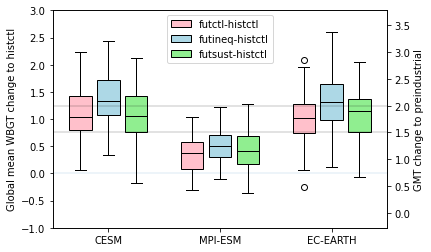

In [22]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-1,3)
ax2.set_ylim(-0.28,3.78)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_ineq_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_sust_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('Global mean WBGT change to histctl')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futctl-histctl', 'futineq-histctl','futsust-histctl'])

#ax2.set_ylabel('GMT change to futctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('GMT change to preindustrial')

In [23]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.1216241457159608,mpiesm 0.3604595238730503,ecearth 0.9842903163544912


In [24]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.4125281374896215,mpiesm 0.5125076952808261,ecearth 1.2844391481957524


In [25]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.0733757145189662,mpiesm 0.4380604513860293,ecearth 1.0494218535279862


In [26]:


ds_TREFHT_hist_1=open_da('wbgt_monmax','hist',esm='cesm',model='clm2',ens='001',stream='h1')
ds_TREFHT_hist_2=open_da('wbgt_monmax','hist','cesm','clm2','002',stream='h1')
ds_TREFHT_hist_3=open_da('wbgt_monmax','hist','cesm','clm2','003',stream='h1')

ds_TREFHT_ctl_1=open_da('wbgt_monmax','futctl','cesm','clm2','001',stream='h1')
ds_TREFHT_ctl_2=open_da('wbgt_monmax','futctl','cesm','clm2','002',stream='h1')
ds_TREFHT_ctl_3=open_da('wbgt_monmax','futctl','cesm','clm2','003',stream='h1')

ds_TREFHT_sust_1=open_da('wbgt_monmax','futsust','cesm','clm2','001',stream='h1')
ds_TREFHT_sust_2=open_da('wbgt_monmax','futsust','cesm','clm2','002',stream='h1')
ds_TREFHT_sust_3=open_da('wbgt_monmax','futsust','cesm','clm2','003',stream='h1')

ds_TREFHT_ineq_1=open_da('wbgt_monmax','futineq','cesm','clm2','001',stream='h1')
ds_TREFHT_ineq_2=open_da('wbgt_monmax','futineq','cesm','clm2','002',stream='h1')
ds_TREFHT_ineq_3=open_da('wbgt_monmax','futineq','cesm','clm2','003',stream='h1')


ds_TREFHT_mpiesm_hist_1=open_da('wbgt_monmax','hist','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_hist_2=open_da('wbgt_monmax','hist','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_hist_3=open_da('wbgt_monmax','hist','mpiesm','clm2','003',stream='h1')

ds_TREFHT_mpiesm_ctl_1=open_da('wbgt_monmax','futctl','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_ctl_2=open_da('wbgt_monmax','futctl','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_ctl_3=open_da('wbgt_monmax','futctl','mpiesm','clm2','003',stream='h1')

ds_TREFHT_mpiesm_sust_1=open_da('wbgt_monmax','futsust','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_sust_2=open_da('wbgt_monmax','futsust','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_sust_3=open_da('wbgt_monmax','futsust','mpiesm','clm2','003',stream='h1')

ds_TREFHT_mpiesm_ineq_1=open_da('wbgt_monmax','futineq','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_ineq_2=open_da('wbgt_monmax','futineq','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_ineq_3=open_da('wbgt_monmax','futineq','mpiesm','clm2','003',stream='h1')

ds_TREFHT_ecearth_hist_1=open_da('wbgt_monmax','hist','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_hist_2=open_da('wbgt_monmax','hist','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_hist_3=open_da('wbgt_monmax','hist','ecearth','clm2','003',stream='h1')

ds_TREFHT_ecearth_ctl_1=open_da('wbgt_monmax','futctl','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_ctl_2=open_da('wbgt_monmax','futctl','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_ctl_3=open_da('wbgt_monmax','futctl','ecearth','clm2','003',stream='h1')

ds_TREFHT_ecearth_sust_1=open_da('wbgt_monmax','futsust','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_sust_2=open_da('wbgt_monmax','futsust','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_sust_3=open_da('wbgt_monmax','futsust','ecearth','clm2','003',stream='h1')

ds_TREFHT_ecearth_ineq_1=open_da('wbgt_monmax','futineq','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_ineq_2=open_da('wbgt_monmax','futineq','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_ineq_3=open_da('wbgt_monmax','futineq','ecearth','clm2','003',stream='h1')


In [27]:
#compute spatial means (global and/or regional)
mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_ecearth.nc')
da_mask=mask_cesm['landmask']
da_mask=da_mask.mean('time')
#    da_mask['lat']=da_delta.lat
#    da_mask['lon']=da_delta.lon
ds_TREFHT_ecearth_land_hist_1_mean=ds_TREFHT_ecearth_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_land_hist_2_mean=ds_TREFHT_ecearth_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_land_hist_3_mean=ds_TREFHT_ecearth_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_land_hist_mean=xr.concat([ds_TREFHT_ecearth_land_hist_1_mean,ds_TREFHT_ecearth_land_hist_2_mean,ds_TREFHT_ecearth_land_hist_3_mean],'time')


ds_TREFHT_ecearth_land_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_mean=xr.concat([ds_TREFHT_ecearth_land_ctl_1_mean,ds_TREFHT_ecearth_land_ctl_2_mean,ds_TREFHT_ecearth_land_ctl_3_mean],'time')


ds_TREFHT_ecearth_land_sust_1_mean=ds_TREFHT_ecearth_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_2_mean=ds_TREFHT_ecearth_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_3_mean=ds_TREFHT_ecearth_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_mean=xr.concat([ds_TREFHT_ecearth_land_sust_1_mean,ds_TREFHT_ecearth_land_sust_2_mean,ds_TREFHT_ecearth_land_sust_3_mean],'time')


ds_TREFHT_ecearth_land_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_mean=xr.concat([ds_TREFHT_ecearth_land_ineq_1_mean,ds_TREFHT_ecearth_land_ineq_2_mean,ds_TREFHT_ecearth_land_ineq_3_mean],'time')

mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_mpiesm.nc')
da_mask=mask_cesm['landmask']
da_mask['lat']=ds_TREFHT_mpiesm_hist_1.lat
da_mask['lon']=ds_TREFHT_mpiesm_hist_1.lon

ds_TREFHT_mpiesm_land_hist_1_mean=ds_TREFHT_mpiesm_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_2_mean=ds_TREFHT_mpiesm_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_3_mean=ds_TREFHT_mpiesm_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_mean=xr.concat([ds_TREFHT_mpiesm_land_hist_1_mean,ds_TREFHT_mpiesm_land_hist_2_mean,ds_TREFHT_mpiesm_land_hist_3_mean],'time')


ds_TREFHT_mpiesm_land_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_mean=xr.concat([ds_TREFHT_mpiesm_land_ctl_1_mean,ds_TREFHT_mpiesm_land_ctl_2_mean,ds_TREFHT_mpiesm_land_ctl_3_mean],'time')


ds_TREFHT_mpiesm_land_sust_1_mean=ds_TREFHT_mpiesm_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_2_mean=ds_TREFHT_mpiesm_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_3_mean=ds_TREFHT_mpiesm_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_mean=xr.concat([ds_TREFHT_mpiesm_land_sust_1_mean,ds_TREFHT_mpiesm_land_sust_2_mean,ds_TREFHT_mpiesm_land_sust_3_mean],'time')


ds_TREFHT_mpiesm_land_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_mean=xr.concat([ds_TREFHT_mpiesm_land_ineq_1_mean,ds_TREFHT_mpiesm_land_ineq_2_mean,ds_TREFHT_mpiesm_land_ineq_3_mean],'time')

mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_cesm.nc')
da_mask=mask_cesm['landmask']

ds_TREFHT_land_hist_1_mean=ds_TREFHT_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_2_mean=ds_TREFHT_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_3_mean=ds_TREFHT_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_mean=xr.concat([ds_TREFHT_land_hist_1_mean,ds_TREFHT_land_hist_2_mean,ds_TREFHT_land_hist_3_mean],'time')


ds_TREFHT_land_ctl_1_mean=ds_TREFHT_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_2_mean=ds_TREFHT_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_3_mean=ds_TREFHT_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_mean=xr.concat([ds_TREFHT_land_ctl_1_mean,ds_TREFHT_land_ctl_2_mean,ds_TREFHT_land_ctl_3_mean],'time')


ds_TREFHT_land_sust_1_mean=ds_TREFHT_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_2_mean=ds_TREFHT_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_3_mean=ds_TREFHT_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_mean=xr.concat([ds_TREFHT_land_sust_1_mean,ds_TREFHT_land_sust_2_mean,ds_TREFHT_land_sust_3_mean],'time')


ds_TREFHT_land_ineq_1_mean=ds_TREFHT_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_2_mean=ds_TREFHT_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_3_mean=ds_TREFHT_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_mean=xr.concat([ds_TREFHT_land_ineq_1_mean,ds_TREFHT_land_ineq_2_mean,ds_TREFHT_land_ineq_3_mean],'time')



Text(0, 0.5, 'WBGTmonmax change to preindustrial')

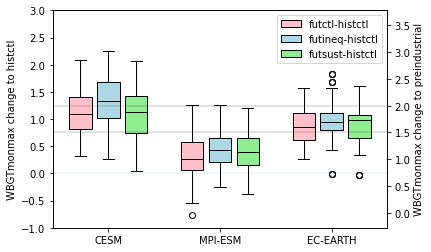

In [28]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-1,3)
ax2.set_ylim(-0.28,3.78)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_land_ctl_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ctl_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ctl_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_land_ineq_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ineq_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ineq_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_land_sust_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_sust_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_sust_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('WBGTmonmax change to histctl')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futctl-histctl', 'futineq-histctl','futsust-histctl'])

#ax2.set_ylabel('GMT change to futland_ctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('WBGTmonmax change to preindustrial')


In [29]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.1099837238692039,mpiesm 0.3146596703072349,ecearth 0.8702498750516061


In [30]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.3272003672912283,mpiesm 0.438719768617716,ecearth 0.9700679124038761


In [31]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.1224539807531617,mpiesm 0.3869800439882214,ecearth 0.9081704654235939
